In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
df = pd.read_csv('../data/processed/financial_features_2010.csv')
df.shape

(476, 48)

In [62]:
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
correlation_matrix

,avg_ROA,ROA_volatility,avg_ROE,ROE_volatility,avg_OperatingMargin,OperatingMargin_volatility,avg_AssetTurnover,AssetTurnover_volatility,avg_CurrentRatio,CurrentRatio_volatility,...,capex_intensity,Revenue_growth_imputed,Assets_growth_imputed,NetIncome_growth_imputed,capex_intensity_imputed,has_rnd,has_goodwill,has_longtermdebt,core_completeness,reporting_consistency
avg_ROA,1.000000,-0.204363,-0.031502,-0.333996,0.586922,-0.017475,0.117345,0.104090,0.133291,-0.069881,...,-0.153785,-0.218796,-0.222601,-0.264171,-0.068802,0.044258,0.119885,0.111069,0.075000,0.075000
ROA_volatility,-0.204363,1.000000,-0.147378,0.422530,-0.192129,0.323147,0.101770,0.310784,0.174475,0.302483,...,0.029903,0.018735,-0.035760,0.125187,-0.039849,0.100678,-0.097807,-0.056161,0.090942,0.090942
avg_ROE,-0.031502,-0.147378,1.000000,0.074404,0.041994,-0.054104,0.062842,0.082339,-0.001455,-0.078648,...,-0.043944,0.002776,0.099304,-0.116160,-0.041793,0.086479,0.089813,0.018963,-0.038000,-0.038000
ROE_volatility,-0.333996,0.422530,0.074404,1.000000,-0.260792,0.124521,0.112647,0.136227,-0.093753,0.021674,...,0.014211,0.033161,0.061703,0.083830,-0.023869,0.153567,0.031292,0.023184,0.042695,0.042695
avg_OperatingMargin,0.586922,-0.192129,0.041994,-0.260792,1.000000,-0.099813,-0.239457,-0.170761,0.186667,0.079376,...,0.045167,-0.110539,-0.078890,-0.297521,-0.021394,0.049061,0.022095,0.060841,0.057144,0.057144
OperatingMargin_volatility,-0.017475,0.323147,-0.054104,0.124521,-0.099813,1.000000,-0.197111,-0.094345,0.028104,0.149310,...,0.332623,-0.085859,-0.054485,0.109974,-0.050994,-0.056519,-0.084010,0.024751,0.130487,0.130487
avg_AssetTurnover,0.117345,0.101770,0.062842,0.112647,-0.239457,-0.197111,1.000000,0.703427,-0.041152,-0.155296,...,-0.246032,-0.144343,-0.038067,-0.054882,-0.159444,-0.007258,0.085728,0.008686,0.057951,0.057951
AssetTurnover_volatility,0.104090,0.310784,0.082339,0.136227,-0.170761,-0.094345,0.703427,1.000000,-0.053190,-0.095507,...,-0.176595,-0.096979,-0.034557,-0.017361,-0.124929,-0.045220,0.076110,0.067787,0.037862,0.037862
avg_CurrentRatio,0.133291,0.174475,-0.001455,-0.093753,0.186667,0.028104,-0.041152,-0.053190,1.000000,0.751778,...,-0.066007,-0.007144,-0.063026,-0.036767,-0.047480,0.311746,-0.035785,-0.132439,0.075125,0.075125
CurrentRatio_volatility,-0.069881,0.302483,-0.078648,0.021674,0.079376,0.149310,-0.155296,-0.095507,0.751778,1.000000,...,0.084997,0.004322,-0.048051,0.045182,-0.032140,0.185095,-0.075226,-0.117866,0.087620,0.087620


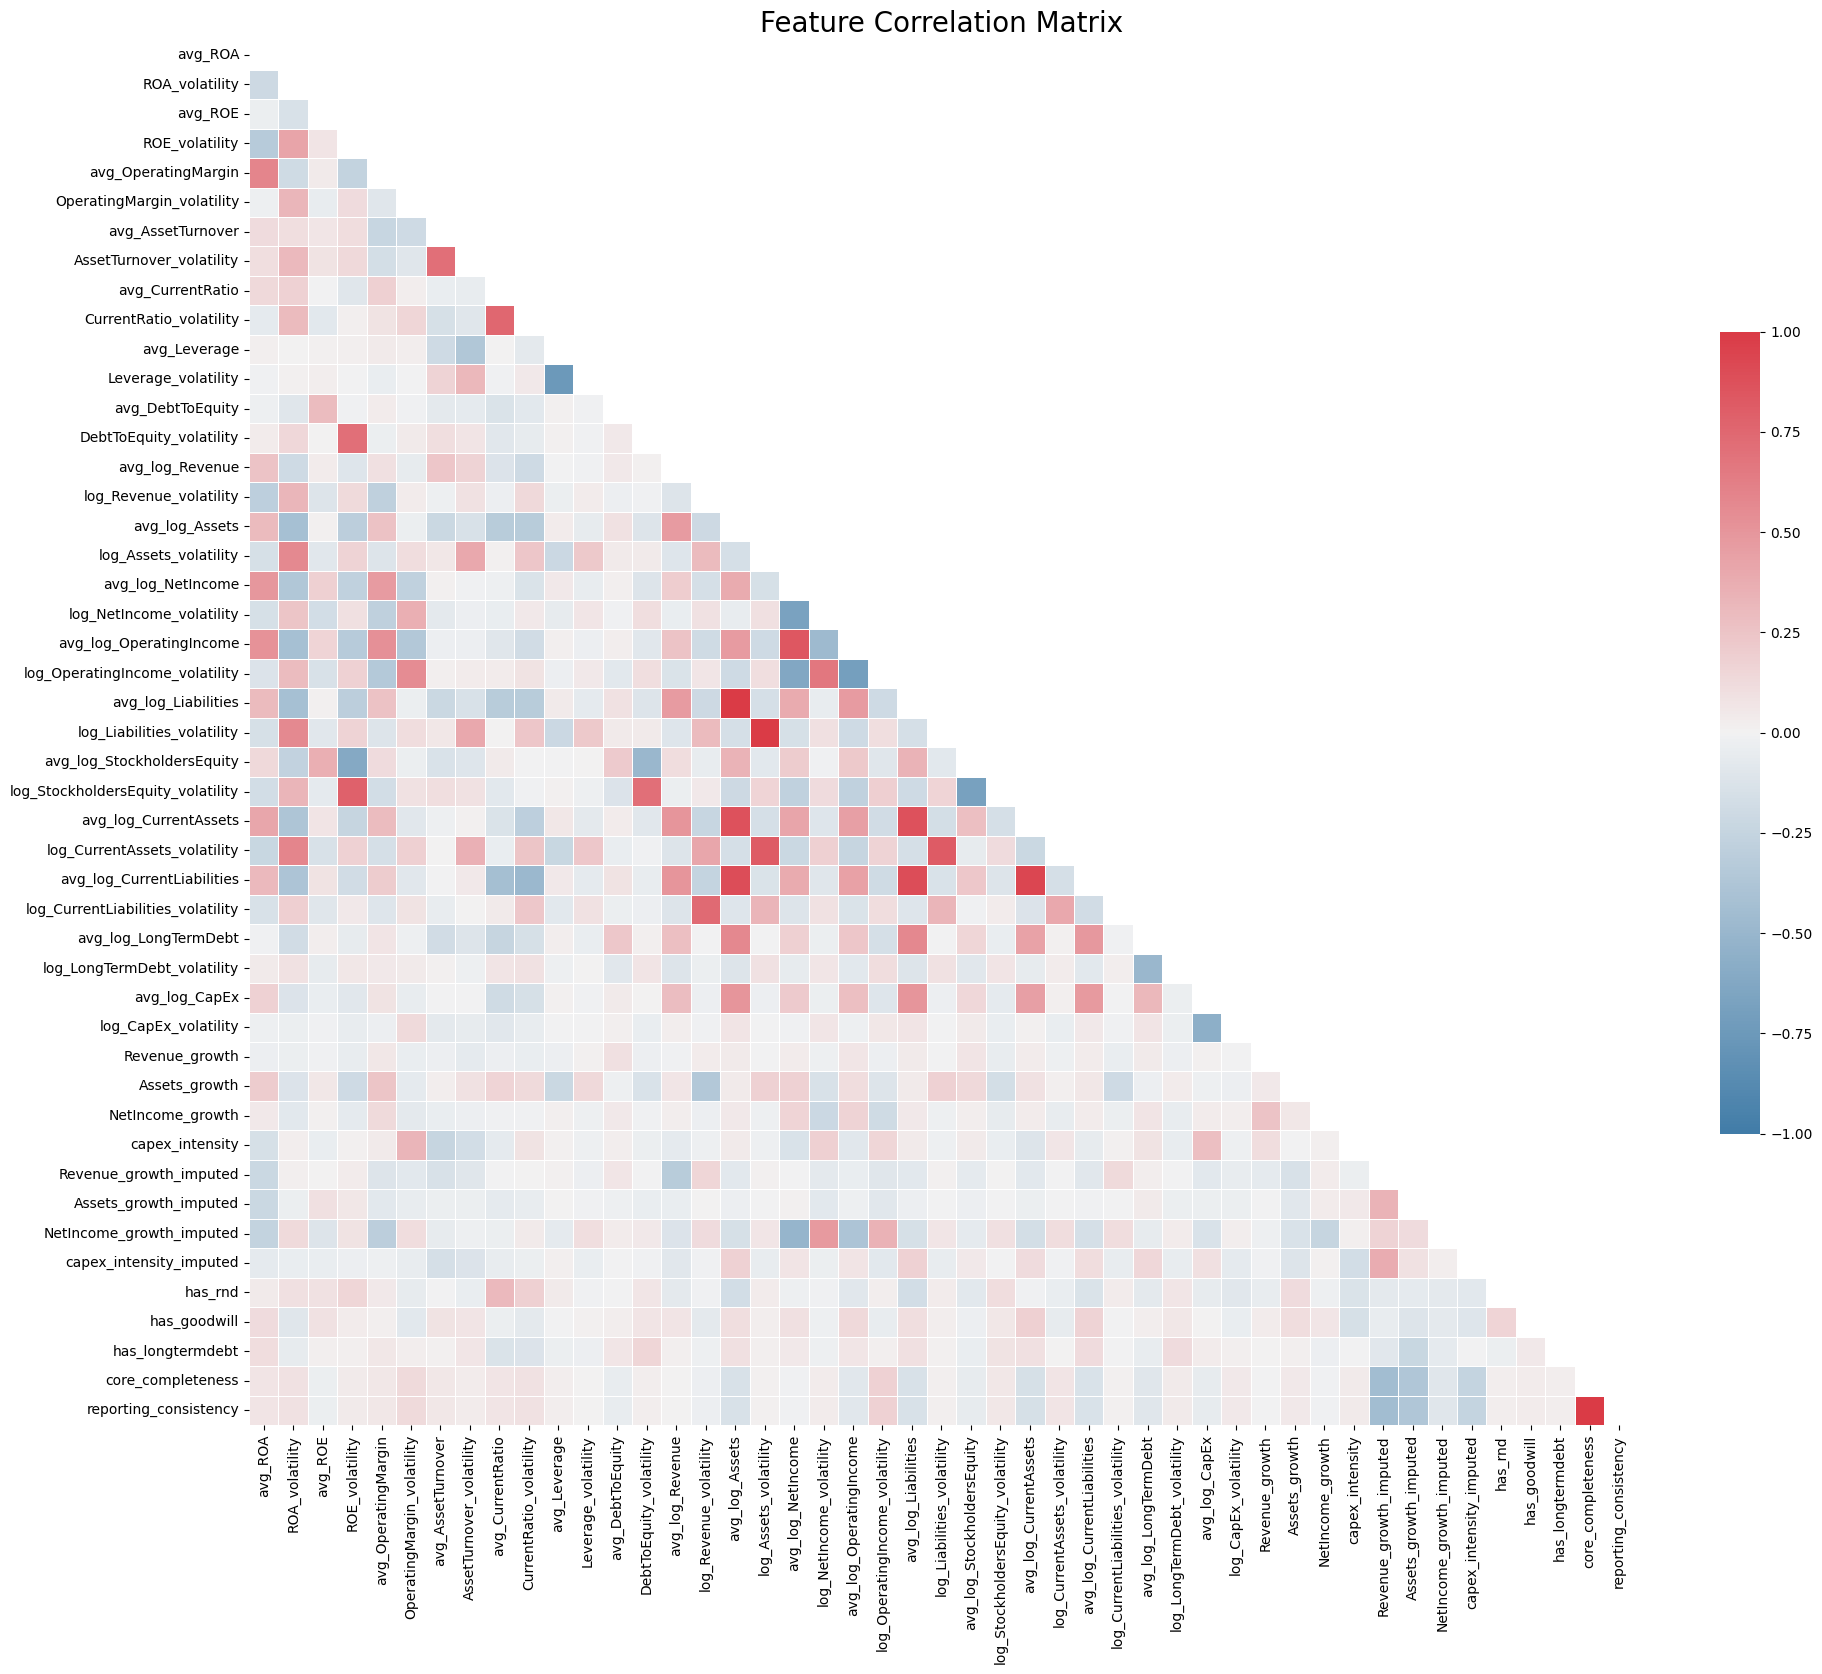

In [63]:
plt.figure(figsize=(20, 18))

cmap = sns.diverging_palette(240, 10, as_cmap=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=1.0, vmin=-1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=False)
plt.title('Feature Correlation Matrix', fontsize=20)
plt.tight_layout()
plt.xticks(rotation=90)
plt.yticks(rotation=0)

plt.show()

In [64]:
print("Highest correlations (|r| > 0.7):")
corr_unstack = correlation_matrix.unstack().sort_values(ascending=False)
high_corr = corr_unstack[(abs(corr_unstack) > 0.7) & (abs(corr_unstack) < 1.0)]
print(high_corr)

Highest correlations (|r| > 0.7):
avg_log_Assets                     avg_log_Liabilities                  0.999987
avg_log_Liabilities                avg_log_Assets                       0.999987
log_Liabilities_volatility         log_Assets_volatility                0.999593
log_Assets_volatility              log_Liabilities_volatility           0.999593
avg_log_CurrentAssets              avg_log_CurrentLiabilities           0.936798
avg_log_CurrentLiabilities         avg_log_CurrentAssets                0.936798
                                   avg_log_Liabilities                  0.898087
avg_log_Liabilities                avg_log_CurrentLiabilities           0.898087
avg_log_Assets                     avg_log_CurrentLiabilities           0.898043
avg_log_CurrentLiabilities         avg_log_Assets                       0.898043
avg_log_CurrentAssets              avg_log_Liabilities                  0.872272
avg_log_Liabilities                avg_log_CurrentAssets                0.8

In [65]:
df.columns

Index(['Unnamed: 0', 'avg_ROA', 'ROA_volatility', 'avg_ROE', 'ROE_volatility',
       'avg_OperatingMargin', 'OperatingMargin_volatility',
       'avg_AssetTurnover', 'AssetTurnover_volatility', 'avg_CurrentRatio',
       'CurrentRatio_volatility', 'avg_Leverage', 'Leverage_volatility',
       'avg_DebtToEquity', 'DebtToEquity_volatility', 'avg_log_Revenue',
       'log_Revenue_volatility', 'avg_log_Assets', 'log_Assets_volatility',
       'avg_log_NetIncome', 'log_NetIncome_volatility',
       'avg_log_OperatingIncome', 'log_OperatingIncome_volatility',
       'avg_log_Liabilities', 'log_Liabilities_volatility',
       'avg_log_StockholdersEquity', 'log_StockholdersEquity_volatility',
       'avg_log_CurrentAssets', 'log_CurrentAssets_volatility',
       'avg_log_CurrentLiabilities', 'log_CurrentLiabilities_volatility',
       'avg_log_LongTermDebt', 'log_LongTermDebt_volatility', 'avg_log_CapEx',
       'log_CapEx_volatility', 'Revenue_growth', 'Assets_growth',
       'NetIncome_grow

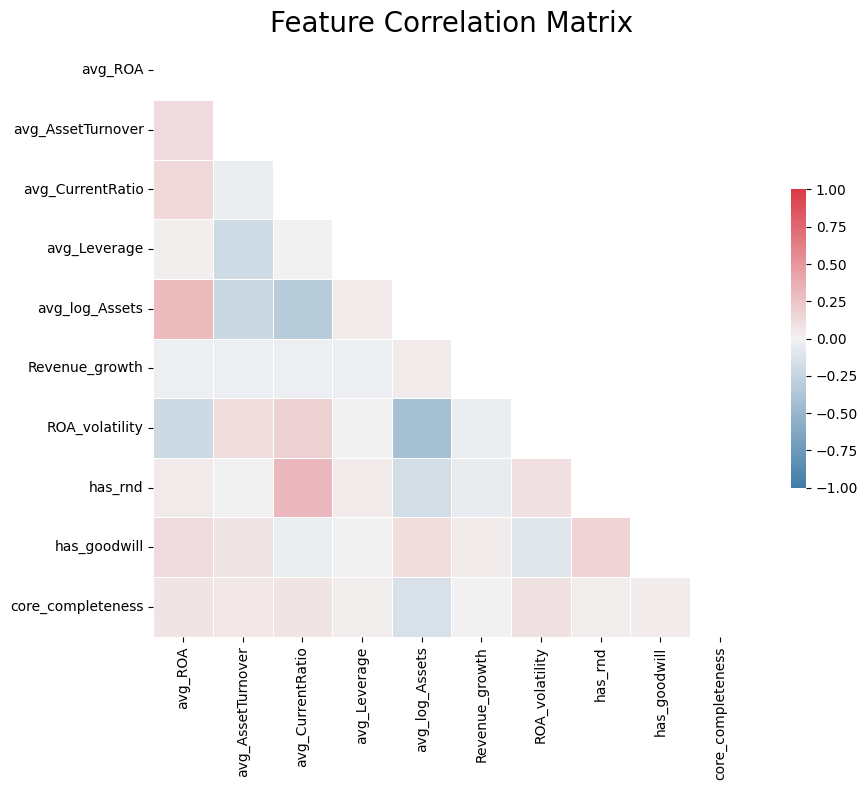

In [66]:
df2 = df[['avg_ROA', 'avg_AssetTurnover','avg_CurrentRatio','avg_Leverage','avg_log_Assets','Revenue_growth','ROA_volatility','has_rnd','has_goodwill','core_completeness']]
corr_matrix2 = df2.corr()
plt.figure(figsize=(10, 8))
cmap = sns.diverging_palette(240, 10, as_cmap=True)
mask = np.triu(np.ones_like(corr_matrix2, dtype=bool))

sns.heatmap(corr_matrix2, mask=mask, cmap=cmap, vmax=1.0, vmin=-1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=False)
plt.title('Feature Correlation Matrix', fontsize=20)
plt.tight_layout()
plt.xticks(rotation=90)
plt.yticks(rotation=0)

plt.show()